## Đang dùng ngon 2 tuần tự nhiên vào 1 cases đặc biệt nào đó => Lỗi cả luồng

```
Uncaught runtime errors:
×
ERROR
Request failed with status code 500
AxiosError: Request failed with status code 500
    at settle (http://103.253.20.13:25038/static/js/bundle.js:44257:12)
    at XMLHttpRequest.onloadend (http://103.253.20.13:25038/static/js/bundle.js:42908:66)
    at Axios.request (http://103.253.20.13:25038/static/js/bundle.js:43407:41)
    at async runScript (http://103.253.20.13:25038/static/js/bundle.js:204:24)
```

## Chạy thử local, lâu ngày vào lại thấy lỗi CORS trên máy

a Hiến ơi, lỗi CORS. 
- Em có 1 con app react đơn giản đã deploy lên server 2 tuần.
- Giờ em lấy code của nó em run như cách run ngày xưa mà nó lại báo CORS. 

mặc dù trong code em chỉ để là 
```
app = Flask(__name__)
CORS(app)
```

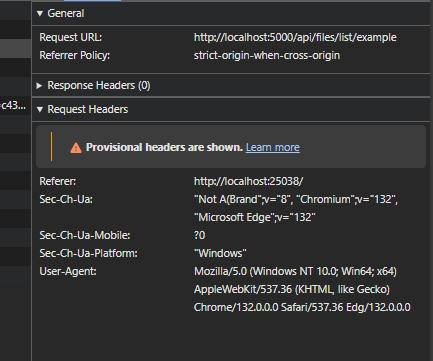

Khi bạn sử dụng `CORS(app)` như trong đoạn mã:

```python
CORS(app)
```

### Ý nghĩa:
- Đây là cách cấu hình mặc định của Flask-CORS, và **nó cho phép tất cả các nguồn (origins)** truy cập API của bạn.
- Nghĩa là:
  - **Tất cả các domain** đều có thể gửi yêu cầu đến server của bạn.
  - Mọi loại **headers** (header mặc định) và **phương thức HTTP** (GET, POST, OPTIONS, v.v.) đều được cho phép, trừ khi bị giới hạn bởi server code.

### Điều này có nghĩa là:
- Trong môi trường phát triển (*development*), việc sử dụng `CORS(app)` giúp bạn **tránh được lỗi CORS hoàn toàn**, vì server không chặn bất kỳ yêu cầu nào từ các domain khác.
- Tuy nhiên, **trong môi trường production**, cách làm này **không an toàn** vì:
  - Nó cho phép mọi nguồn truy cập (bao gồm cả những nguồn không đáng tin cậy).
  - Dữ liệu API của bạn dễ bị khai thác bởi các ứng dụng hoặc trang web không mong muốn.

---

### Lời khuyên:
Nếu bạn muốn tránh CORS **mãi mãi** nhưng vẫn đảm bảo bảo mật, bạn nên giới hạn quyền truy cập chỉ từ các nguồn đáng tin cậy. Ví dụ:

```python
CORS(app, resources={
    r"/*": {
        "origins": ["http://trusted-domain.com", "http://another-trusted-domain.com"],  # Chỉ cho phép các domain này
        "methods": ["GET", "POST"],  # Chỉ các phương thức này được phép
        "allow_headers": ["Content-Type", "Authorization"],  # Chỉ định các headers cần thiết
        "expose_headers": ["Authorization"]  # Các headers mà client có thể nhìn thấy
    }
})
```

### Kết luận:
- **`CORS(app)` sẽ không bao giờ bị lỗi CORS trong môi trường phát triển.**
- Tuy nhiên, để bảo mật hơn trong môi trường production, hãy cấu hình CORS cẩn thận, chỉ cho phép các domain đáng tin cậy thay vì sử dụng wildcard (`*`).

## 1. Sao đã mở CORS ALL rồi mà vẫn bug CORS nhỉ 

Nếu bạn đã cấu hình CORS cho phép tất cả các nguồn trong ứng dụng Flask của mình nhưng vẫn gặp lỗi CORS trong môi trường phát triển, có thể có một số nguyên nhân khác nhau gây ra vấn đề này. Dưới đây là một số điều bạn có thể kiểm tra và thử nghiệm:

### 1. Kiểm Tra Đường Dẫn API
Đảm bảo rằng bạn đang gọi đúng đường dẫn API từ frontend. Nếu đường dẫn không chính xác, bạn có thể nhận được lỗi 500 mà không phải do CORS.

### 2. Kiểm Tra Lỗi Trong Backend
Khi bạn nhận được lỗi 500, điều này có nghĩa là có một lỗi xảy ra trong mã backend. Kiểm tra log của Flask để xem thông báo lỗi cụ thể. Bạn có thể thêm logging để ghi lại các lỗi trong các route của bạn.

### 3. CORS Middleware
Đảm bảo rằng middleware CORS được đặt trước các route trong ứng dụng Flask. Nếu bạn có bất kỳ middleware nào khác, hãy chắc chắn rằng CORS được xử lý trước.

### 4. Cấu Hình CORS
Mặc dù bạn đã sử dụng `CORS(app)`, hãy thử cấu hình lại như sau để đảm bảo rằng không có vấn đề gì với cấu hình:

```python:deploy1.1/backend/app.py
from flask import Flask
from flask_cors import CORS

app = Flask(__name__)
CORS(app, supports_credentials=True)  # Thêm supports_credentials nếu cần thiết
```

### 5. Kiểm Tra Trình Duyệt
Đôi khi, trình duyệt có thể lưu cache các yêu cầu CORS. Hãy thử xóa cache của trình duyệt hoặc thử nghiệm trên một trình duyệt khác.

### 6. Kiểm Tra CORS Trên Môi Trường Khác
Nếu bạn đang chạy ứng dụng trên Docker, hãy đảm bảo rằng các container có thể giao tiếp với nhau. Kiểm tra cấu hình mạng trong Docker Compose để đảm bảo rằng các dịch vụ có thể truy cập lẫn nhau.

### 7. Thử Gọi API Trực Tiếp
Sử dụng công cụ như Postman hoặc cURL để gọi trực tiếp API mà không thông qua frontend. Điều này giúp xác định xem vấn đề có phải do frontend hay không.

### 8. Kiểm Tra Cấu Hình Proxy
Nếu bạn đang sử dụng một proxy (như Nginx hoặc Apache) để chuyển tiếp yêu cầu đến ứng dụng Flask, hãy đảm bảo rằng proxy cũng được cấu hình để cho phép CORS.

### 9. Xem Xét Các Thư Viện Khác
Nếu bạn đang sử dụng các thư viện khác trong frontend (như Axios), hãy kiểm tra xem có bất kỳ cấu hình nào liên quan đến CORS trong các thư viện đó không.

### Kết Luận
Nếu bạn đã thử tất cả các bước trên mà vẫn gặp vấn đề, hãy cung cấp thêm thông tin về cách bạn gọi API từ frontend và bất kỳ thông báo lỗi nào từ log của Flask. Điều này sẽ giúp tôi hỗ trợ bạn tốt hơn!


## 2. Lỗi này là gì, nguyên nhân do đâu, giải pháp. giờ quan trọng là lỗi CORS.,hãy hướng dẫn tôi từng bước để vá lỗi 
giải thích tại sao bạn làm thế



Tôi sẽ hướng dẫn bạn từng bước để sửa lỗi CORS trong file `app.py`:

### Bước 1: Sửa lại cấu hình CORS hiện tại
Hiện tại bạn đang có 2 lần khai báo CORS, điều này có thể gây xung đột. Hãy gộp lại thành một:

````python:deploy1.1/backend/app.py
from flask import Flask
from flask_cors import CORS
from api.scripts import bp as scripts_bp
from api.files import bp as files_bp

app = Flask(__name__)

# Cấu hình CORS một lần duy nhất
CORS(app, 
     resources={
        r"/api/*": {  # Chỉ áp dụng cho các route bắt đầu bằng /api/
            "origins": [
                "http://localhost:25038",
                "http://localhost:3000",  # Development
                "http://103.253.20.13:25038"  # Production
            ],
            "methods": ["GET", "POST", "PUT", "DELETE", "OPTIONS"],
            "allow_headers": ["Content-Type", "Authorization", "Access-Control-Allow-Credentials"],
            "supports_credentials": True,
            "expose_headers": ["Authorization"]
        }
     })
````

**Giải thích:**
- `r"/api/*"`: Chỉ áp dụng cho các API endpoint, tăng tính bảo mật
- `supports_credentials`: Cho phép gửi cookies và credentials
- Thêm đầy đủ các HTTP methods cần thiết
- Chỉ định rõ các origins được phép

### Bước 2: Thêm middleware để xử lý CORS

````python:deploy1.1/backend/app.py
# Thêm middleware này sau khi khởi tạo app
@app.after_request
def after_request(response):
    # Lấy origin từ request
    origin = request.headers.get('Origin')
    allowed_origins = [
        "http://localhost:25038",
        "http://localhost:3000",
        "http://103.253.20.13:25038"
    ]
    
    if origin in allowed_origins:
        response.headers.add('Access-Control-Allow-Origin', origin)
        response.headers.add('Access-Control-Allow-Credentials', 'true')
        response.headers.add('Access-Control-Allow-Headers', 'Content-Type,Authorization')
        response.headers.add('Access-Control-Allow-Methods', 'GET,PUT,POST,DELETE,OPTIONS')
    
    return response
````

**Giải thích:**
- Middleware này chạy sau mỗi request
- Kiểm tra origin có trong danh sách cho phép
- Thêm các CORS headers cần thiết vào response

### Bước 3: Thêm route xử lý OPTIONS request

````python:deploy1.1/backend/app.py
@app.route('/api/<path:path>', methods=['OPTIONS'])
def handle_options(path):
    return '', 204
````

**Giải thích:**
- Xử lý preflight requests từ trình duyệt
- Trả về 204 No Content cho OPTIONS requests

### Bước 4: File hoàn chỉnh

````python:deploy1.1/backend/app.py
from flask import Flask, request
from flask_cors import CORS
from api.scripts import bp as scripts_bp
from api.files import bp as files_bp

app = Flask(__name__)

# Cấu hình CORS
CORS(app, 
     resources={
        r"/api/*": {
            "origins": [
                "http://localhost:25038",
                "http://localhost:3000",
                "http://103.253.20.13:25038"
            ],
            "methods": ["GET", "POST", "PUT", "DELETE", "OPTIONS"],
            "allow_headers": ["Content-Type", "Authorization", "Access-Control-Allow-Credentials"],
            "supports_credentials": True,
            "expose_headers": ["Authorization"]
        }
     })

@app.after_request
def after_request(response):
    origin = request.headers.get('Origin')
    allowed_origins = [
        "http://localhost:25038",
        "http://localhost:3000",
        "http://103.253.20.13:25038"
    ]
    
    if origin in allowed_origins:
        response.headers.add('Access-Control-Allow-Origin', origin)
        response.headers.add('Access-Control-Allow-Credentials', 'true')
        response.headers.add('Access-Control-Allow-Headers', 'Content-Type,Authorization')
        response.headers.add('Access-Control-Allow-Methods', 'GET,PUT,POST,DELETE,OPTIONS')
    
    return response

@app.route('/api/<path:path>', methods=['OPTIONS'])
def handle_options(path):
    return '', 204

# Register blueprints
app.register_blueprint(scripts_bp, url_prefix='/api/scripts')
app.register_blueprint(files_bp, url_prefix='/api/files')

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
````

### Bước 5: Kiểm tra
1. Restart Flask server
2. Xóa cache trình duyệt
3. Thử lại các API calls từ frontend

### Lưu ý quan trọng:
- Đảm bảo frontend gọi đúng URL của backend
- Kiểm tra console trình duyệt để xem có lỗi CORS nào khác không
- Nếu sử dụng Axios, đảm bảo đã cấu hình `withCredentials: true`

Nếu vẫn gặp vấn đề, hãy kiểm tra logs của backend để xem có lỗi nào khác không và cho tôi biết để tôi có thể giúp bạn tiếp!


Không, trong trường hợp này bạn không cần thêm route OPTIONS riêng vì:

1. **Flask-CORS đã tự động xử lý OPTIONS requests**:
- Khi bạn sử dụng `CORS(app)`, Flask-CORS tự động xử lý các preflight requests (OPTIONS)
- Nó đã thêm các headers CORS cần thiết vào response

2. **Bạn đã có 2 lớp bảo vệ CORS**:
```python
# Lớp 1: Cấu hình CORS chính
CORS(app, resources={
    r"/*": {
        "origins": ["http://localhost:25038", ...],
        "methods": ["GET", "POST"],
        ...
    }
})

# Lớp 2: Middleware after_request
@app.after_request
def after_request(response):
    # Xử lý CORS headers
    ...
```

3. **Có thể gây xung đột**:
- Thêm route OPTIONS riêng có thể gây xung đột với cơ chế xử lý CORS mặc định của Flask-CORS
- Có thể dẫn đến việc headers CORS bị ghi đè hoặc không được áp dụng đúng cách

Nếu bạn vẫn gặp vấn đề với CORS, thay vì thêm route OPTIONS, hãy:
1. Kiểm tra logs để xem lỗi cụ thể
2. Đảm bảo origins trong cấu hình CORS khớp với domain của frontend
3. Kiểm tra các headers trong Network tab của Developer Tools


## supports_credentials: Cho phép gửi cookies và credentials

là gì nhỉ 



`supports_credentials` là một tùy chọn quan trọng trong CORS liên quan đến việc gửi và nhận credentials (thông tin xác thực) trong các request cross-origin. 

### Credentials bao gồm:
1. **Cookies**
2. **HTTP Authentication** (Basic Auth, Bearer token)
3. **SSL Certificates**
4. **Headers xác thực tùy chỉnh** (ví dụ: Authorization header)

### Ví dụ thực tế:
```python
# Backend (Flask)
CORS(app, resources={
    r"/api/*": {
        "origins": ["http://localhost:25038"],
        "supports_credentials": True  # Cho phép gửi credentials
    }
})
```

```javascript
// Frontend (React với Axios)
const api = axios.create({
    baseURL: 'http://localhost:5000',
    withCredentials: true,  // Phải set true để gửi credentials
});

// Ví dụ gọi API có kèm token trong header
api.get('/api/user-data', {
    headers: {
        'Authorization': 'Bearer your-token-here'
    }
});
```

### Khi nào cần dùng?
1. **Authentication/Authorization**:
   - Khi bạn cần gửi token xác thực
   - Khi sử dụng session-based authentication với cookies

2. **Bảo mật API**:
   ```javascript
   // Frontend gửi request với token
   fetch('http://localhost:5000/api/secure-data', {
       credentials: 'include',  // Bắt buộc khi supports_credentials: true
       headers: {
           'Authorization': 'Bearer token123'
       }
   });
   ```

3. **Session Management**:
   ```python
   # Backend lưu session
   @app.route('/api/login', methods=['POST'])
   def login():
       session['user_id'] = user.id  # Lưu vào session cookie
       return jsonify({'message': 'Logged in'})
   ```

### Lưu ý quan trọng:
1. **Cấu hình phải khớp**:
   - Backend: `supports_credentials: True`
   - Frontend: `withCredentials: true`

2. **Không thể dùng wildcard origin**:
   ```python
   # KHÔNG ĐƯỢC: Khi supports_credentials: True
   "origins": ["*"]  # Sai
   
   # PHẢI: Chỉ định rõ origins
   "origins": ["http://localhost:25038"]  # Đúng
   ```

3. **Bảo mật**:
   - Chỉ bật `supports_credentials` khi thực sự cần thiết
   - Luôn chỉ định rõ các origins được phép
   - Cẩn thận với việc lưu trữ sensitive data trong cookies

### Ví dụ hoàn chỉnh:
```python:deploy1.1/backend/app.py
CORS(app, resources={
    r"/api/*": {
        "origins": [
            "http://localhost:25038",
            "http://localhost:3000",
            "http://103.253.20.13:25038"
        ],
        "methods": ["GET", "POST", "PUT", "DELETE"],
        "allow_headers": ["Content-Type", "Authorization"],
        "supports_credentials": True,  # Cho phép gửi credentials
        "expose_headers": ["Authorization"]
    }
})
```

```javascript:frontend/src/api/index.js
import axios from 'axios';

const api = axios.create({
    baseURL: process.env.REACT_APP_API_URL,
    withCredentials: true,  // Bắt buộc khi backend có supports_credentials
    headers: {
        'Content-Type': 'application/json'
    }
});

export default api;
```

Khi đã hiểu rõ về `supports_credentials`, bạn có thể quyết định xem có thực sự cần nó hay không trong ứng dụng của mình.


### nếu tắt cái này đi thì sao nhỉ, web đơn giản



Đúng vậy! Nếu web của bạn đơn giản, không cần xác thực hoặc không cần gửi cookies/credentials, bạn có thể đơn giản hóa cấu hình CORS. Đây là phiên bản đơn giản hóa:

```python:deploy1.1/backend/app.py
from flask import Flask, request
from flask_cors import CORS
from api.scripts import bp as scripts_bp
from api.files import bp as files_bp

app = Flask(__name__)

# Cấu hình CORS đơn giản hơn
CORS(app, resources={
    r"/api/*": {
        "origins": [
            "http://localhost:25038",
            "http://localhost:3000",
            "http://103.253.20.13:25038"
        ],
        "methods": ["GET", "POST"],  # Chỉ các methods cần thiết
        "allow_headers": ["Content-Type"]  # Headers cơ bản
    }
})

# Register blueprints
app.register_blueprint(scripts_bp, url_prefix='/api/scripts')
app.register_blueprint(files_bp, url_prefix='/api/files')

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
```

### Những thứ đã bỏ đi:
1. `supports_credentials`: Không cần vì không dùng cookies/auth
2. `Authorization` headers: Không cần vì không có xác thực
3. `@app.after_request`: Không cần middleware phức tạp
4. Các headers CORS phức tạp

### Lợi ích:
1. Code đơn giản, dễ maintain
2. Giảm overhead cho mỗi request
3. Ít rủi ro bảo mật hơn
4. Dễ debug khi có vấn đề

Nếu web của bạn chỉ là API đơn giản để upload/download files và chạy scripts, phiên bản này là đủ dùng và an toàn.


## Bỏ đi về sự cơ bản 



Đúng vậy! Nếu web của bạn đơn giản, không cần xác thực hoặc không cần gửi cookies/credentials, bạn có thể đơn giản hóa cấu hình CORS. Đây là phiên bản đơn giản hóa:

```python:deploy1.1/backend/app.py
from flask import Flask, request
from flask_cors import CORS
from api.scripts import bp as scripts_bp
from api.files import bp as files_bp

app = Flask(__name__)

# Cấu hình CORS đơn giản hơn
CORS(app, resources={
    r"/api/*": {
        "origins": [
            "http://localhost:25038",
            "http://localhost:3000",
            "http://103.253.20.13:25038"
        ],
        "methods": ["GET", "POST"],  # Chỉ các methods cần thiết
        "allow_headers": ["Content-Type"]  # Headers cơ bản
    }
})

# Register blueprints
app.register_blueprint(scripts_bp, url_prefix='/api/scripts')
app.register_blueprint(files_bp, url_prefix='/api/files')

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
```

### Những thứ đã bỏ đi:
1. `supports_credentials`: Không cần vì không dùng cookies/auth
2. `Authorization` headers: Không cần vì không có xác thực
3. `@app.after_request`: Không cần middleware phức tạp
4. Các headers CORS phức tạp

### Lợi ích:
1. Code đơn giản, dễ maintain
2. Giảm overhead cho mỗi request
3. Ít rủi ro bảo mật hơn
4. Dễ debug khi có vấn đề

Nếu web của bạn chỉ là API đơn giản để upload/download files và chạy scripts, phiên bản này là đủ dùng và an toàn.




Nếu vẫn bị lỗi CORS, có thể do một số nguyên nhân. Hãy thử cách đơn giản nhất - cho phép tất cả các nguồn truy cập:

`````python:deploy1.1/backend/app.py
from flask import Flask
from flask_cors import CORS
from api.scripts import bp as scripts_bp
from api.files import bp as files_bp

app = Flask(__name__)

# Cách 1: Đơn giản nhất - cho phép tất cả
CORS(app)

# Register blueprints
app.register_blueprint(scripts_bp, url_prefix='/api/scripts')
app.register_blueprint(files_bp, url_prefix='/api/files')

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)
`````

### Giải thích:
1. `CORS(app)`: 
   - Cho phép tất cả origins
   - Cho phép tất cả methods
   - Cho phép tất cả headers
   - Không cần cấu hình phức tạp

2. **Lợi ích**:
   - Đơn giản nhất
   - Phù hợp cho development
   - Không cần quan tâm đến các cấu hình chi tiết

3. **Lưu ý**:
   - Chỉ nên dùng trong môi trường development
   - Không nên dùng trong production nếu cần bảo mật cao

Nếu vẫn gặp lỗi, hãy:
1. Restart Flask server
2. Xóa cache trình duyệt
3. Kiểm tra console để xem lỗi cụ thể là gì
